In [1]:
import pandas as pd

In [2]:
news_data = pd.read_csv("output.csv")

In [3]:
news_data = news_data.dropna(subset=['summary', 'title'])

In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# sia.polarity_scores("Wow, NLTK is really powerful!")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sdrzx\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
def get_nltk_pos(text):
    return sia.polarity_scores(text)['pos']

In [6]:
def get_nltk_neg(text):
    return sia.polarity_scores(text)['neg']

In [7]:
def get_nltk_neu(text):
    return sia.polarity_scores(text)['neu']

In [8]:
def get_nltk_compound(text):
    return sia.polarity_scores(text)['compound']

In [9]:
news_data["summary_nltk_pos"] = news_data["summary"].apply(get_nltk_pos)
news_data["summary_nltk_neg"] = news_data["summary"].apply(get_nltk_neg)
news_data["summary_nltk_neu"] = news_data["summary"].apply(get_nltk_neu)
news_data["summary_nltk_compound"] = news_data["summary"].apply(get_nltk_compound)

In [10]:
news_data["title_nltk_pos"] = news_data["title"].apply(get_nltk_pos)
news_data["title_nltk_neg"] = news_data["title"].apply(get_nltk_neg)
news_data["title_nltk_neu"] = news_data["title"].apply(get_nltk_neu)
news_data["title_nltk_compound"] = news_data["title"].apply(get_nltk_compound)

In [11]:
news_data["content_nltk_pos"] = news_data["content"].apply(get_nltk_pos)
news_data["content_nltk_neg"] = news_data["content"].apply(get_nltk_neg)
news_data["content_nltk_neu"] = news_data["content"].apply(get_nltk_neu)
news_data["content_nltk_compound"] = news_data["content"].apply(get_nltk_compound)

In [12]:
from flair.models import TextClassifier
from flair.data import Sentence

In [13]:
classifier = TextClassifier.load('sentiment-fast')

In [14]:
def get_flair_value(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.to_dict()['all labels'][0]['value']

In [15]:
def get_flair_confidence(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.to_dict()['all labels'][0]['confidence']

In [16]:
news_data["summary_flair_value"] = news_data["summary"].apply(get_flair_value)
news_data["summary_flair_confidence"] = news_data["summary"].apply(get_flair_confidence)

In [17]:
news_data["title_flair_value"] = news_data["title"].apply(get_flair_value)
news_data["title_flair_confidence"] = news_data["title"].apply(get_flair_confidence)

In [18]:
news_data["content_flair_value"] = news_data["content"].apply(get_flair_value)
news_data["content_flair_confidence"] = news_data["content"].apply(get_flair_confidence)

In [19]:
# sentence.to_dict()

In [20]:
news_data.head(5)

,url,authorsByline,articleId,clusterId,source,imageUrl,country,language,pubDate,addDate,...,content_nltk_pos,content_nltk_neg,content_nltk_neu,content_nltk_compound,summary_flair_value,summary_flair_confidence,title_flair_value,title_flair_confidence,content_flair_value,content_flair_confidence
0,https://www.miamiherald.com/miami-com/miami-co...,Connie Ogle,5f3d97906747420c8bb6b91f12c8a6f0,a0b22ada27724ff6a47a16fd274b600d,{'domain': 'miamiherald.com'},https://www.miamiherald.com/latest-news/3tm9yp...,us,en,2021-03-31T07:00:00+00:00,2022-01-12T14:21:27.848032+00:00,...,0.145,0.063,0.792,0.9863,POSITIVE,0.978880,POSITIVE,0.990426,POSITIVE,0.550944
1,https://www.newsweek.com/bitcoins-limited-supp...,Scott Reeves,40e800cf57ef421d82004a004fb298d3,447e03b55f144fe59cb8362317fd6a51,{'domain': 'newsweek.com'},https://d.newsweek.com/en/full/1767963/chipotl...,us,en,2021-03-31T07:00:00+00:00,2021-03-31T07:00:00+00:00,...,0.094,0.049,0.857,0.9877,POSITIVE,0.931149,NEGATIVE,0.903234,POSITIVE,0.736588
2,https://variety.com/2021/tv/news/endeavor-ipo-...,Cynthia Littleton,360885c605e84fd5b384683c0e5eecbd,ec7159eefb2e42ed9aeef99200830130,{'domain': 'variety.com'},https://variety.com/wp-content/uploads/2021/03...,us,en,2021-03-31T07:00:00+00:00,2021-03-31T07:00:00+00:00,...,0.087,0.024,0.889,0.9963,NEGATIVE,0.942734,NEGATIVE,0.574478,POSITIVE,0.969151
3,https://variety.com/2021/film/news/kurt-vonneg...,Brent Lang,1b3df2def46a4439b0797b259e1b0931,cc0cbef1efa1468daf26d6321b175063,{'domain': 'variety.com'},https://variety.com/wp-content/uploads/2021/03...,us,en,2021-03-31T07:00:00+00:00,2021-03-31T07:00:00+00:00,...,0.093,0.069,0.838,0.8957,POSITIVE,0.999201,POSITIVE,0.991309,POSITIVE,0.999117
4,https://www.mlive.com/news/flint/2021/03/flint...,Dylan Goetz | dgoetz@mlive.com dgoetz,9673b473b72c44ffa6201ea73fc52676,f19d86c0045348b6b7c9cd4cf562211d,{'domain': 'mlive.com'},https://www.mlive.com/resizer/MqBwGEow9E_6Ff7h...,us,en,2021-03-31T07:00:00+00:00,2021-03-31T07:00:00+00:00,...,0.164,0.005,0.831,0.9937,POSITIVE,0.996973,POSITIVE,0.645040,NEGATIVE,0.556297


In [21]:
news_data.to_pickle("temp.pkl")

### Trading date

In [22]:
import pandas as pd
import numpy as np
news_data = pd.read_pickle("temp.pkl")

In [23]:
stock_data_df = pd.read_pickle("stock_price_all.pkl")

In [24]:
trading_date = stock_data_df.index

In [25]:
news_data['pubDate_date_only'] = news_data['pubDate'].str[:10]
news_data['pubDate_date_only'] = pd.to_datetime(news_data['pubDate_date_only'])

In [26]:
news_data['summary_flair_score'] = np.where(news_data['summary_flair_value'] == "POSITIVE", \
                                            news_data['summary_flair_confidence'], \
                                            1 - news_data['summary_flair_confidence'])

news_data['title_flair_score'] = np.where(news_data['title_flair_value'] == "POSITIVE", \
                                          news_data['title_flair_confidence'], \
                                          1 - news_data['title_flair_confidence'])

news_data['content_flair_score'] = np.where(news_data['content_flair_value'] == "POSITIVE", \
                                            news_data['content_flair_confidence'], \
                                            1 - news_data['content_flair_confidence'])

In [27]:
news_data.columns

Index(['url', 'authorsByline', 'articleId', 'clusterId', 'source', 'imageUrl',
       'country', 'language', 'pubDate', 'addDate', 'refreshDate', 'score',
       'title', 'description', 'content', 'medium', 'labels', 'matchedAuthors',
       'claim', 'verdict', 'keywords', 'topics', 'categories', 'entities',
       'sentiment', 'summary', 'translation', 'locations', 'reprint', 'places',
       'summary_nltk_pos', 'summary_nltk_neg', 'summary_nltk_neu',
       'summary_nltk_compound', 'title_nltk_pos', 'title_nltk_neg',
       'title_nltk_neu', 'title_nltk_compound', 'content_nltk_pos',
       'content_nltk_neg', 'content_nltk_neu', 'content_nltk_compound',
       'summary_flair_value', 'summary_flair_confidence', 'title_flair_value',
       'title_flair_confidence', 'content_flair_value',
       'content_flair_confidence', 'pubDate_date_only', 'summary_flair_score',
       'title_flair_score', 'content_flair_score'],
      dtype='object')

In [28]:
news_data_df = news_data[['summary_nltk_pos', 'summary_nltk_neg', 'summary_nltk_neu',
                                   'summary_nltk_compound', 'title_nltk_pos', 'title_nltk_neg',
                                   'title_nltk_neu', 'title_nltk_compound', 'content_nltk_pos',
                                   'content_nltk_neg', 'content_nltk_neu', 'content_nltk_compound',
                                   'pubDate_date_only', 'summary_flair_score',
                                   'title_flair_score', 'content_flair_score']]

In [29]:
# news_data_df.summary_nltk_pos.max()

create a df with trading date inside <br/>
for each trading date <br/>
    if the news_data_calculate_avg has trading date: <br/>
        calculate the avg on trading date <br/>
        return the avg <br/>
    elif the news_data_calculate_avg dont have trading date: <br/>
        calcuate the expo moving avg from today to 6 days

In [30]:
trading_date_df = pd.DataFrame(trading_date)

In [31]:
news_data_df_grouped = news_data_df.groupby('pubDate_date_only').mean().reset_index()
merged = pd.merge(trading_date_df, news_data_df_grouped, left_on='Date', right_on='pubDate_date_only', how='left')
merged = merged.drop(columns='pubDate_date_only')

news_data_df_grouped_rolling = news_data_df.groupby('pubDate_date_only').mean().rolling(6).mean().reset_index()

In [32]:
merged_na = merged[merged.isna().any(axis=1)]

for i, r in merged_na.iterrows():
    curDate = r['Date']
    minDateDiff = pd.to_timedelta('365 days 00:00:00')
    r_columns = ['summary_nltk_pos', 'summary_nltk_neg', 'summary_nltk_neu',
               'summary_nltk_compound', 'title_nltk_pos', 'title_nltk_neg',
               'title_nltk_neu', 'title_nltk_compound', 'content_nltk_pos',
               'content_nltk_neg', 'content_nltk_neu', 'content_nltk_compound',
               'summary_flair_score', 'title_flair_score', 'content_flair_score']
    r_value = dict.fromkeys(r_columns)
    
    for index, row in news_data_df_grouped_rolling.iterrows():
        if (abs(curDate - row['pubDate_date_only']) < minDateDiff) & ((curDate - row['pubDate_date_only']) > pd.to_timedelta('0 days 00:00:00')):
            minDateDiff = abs(curDate - row['pubDate_date_only'])
            
            for col in r_columns:
                r_value[col] = row[col]
    
    # print(minDateDiff)            
    for col in r_columns:
        merged_na.at[i, col] = r_value[col]

In [33]:
final_df = pd.concat([merged.dropna(), merged_na]).sort_values('Date')

<AxesSubplot:>

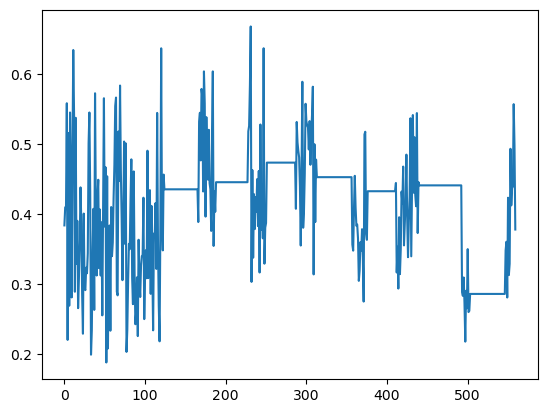

In [34]:
final_df.content_flair_score.plot()

In [35]:
final_df.to_pickle('news_sen_score.pkl')